In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from keras.layers import Dropout
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
# Додайте шари інших типів (Conv2D, MaxPooling2D, Dense) з різною кількістю шарів та функціями активації
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 класів у CIFAR-10

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
from tensorflow.keras.utils import to_categorical

# Завантаження даних CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Нормалізація даних та перетворення міток у формат "one-hot encoding"
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Створення та навчання моделі
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 45s 28ms/step - loss: 1.4639 - accuracy: 0.4750 - val_loss: 1.2361 - val_accuracy: 0.5644
Epoch 2/10
1563/1563 [==============================] - 44s 28ms/step - loss: 1.1878 - accuracy: 0.5836 - val_loss: 1.2262 - val_accuracy: 0.5704
Epoch 3/10
1563/1563 [==============================] - 43s 28ms/step - loss: 1.0929 - accuracy: 0.6168 - val_loss: 1.1282 - val_accuracy: 0.6020
Epoch 4/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0251 - accuracy: 0.6408 - val_loss: 1.1182 - val_accuracy: 0.6068
Epoch 5/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9673 - accuracy: 0.6625 - val_loss: 1.0664 - val_accuracy: 0.6344
Epoch 6/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.9217 - accuracy: 0.6785 - val_loss: 1.1327 - val_accuracy: 0.6073
Epoch 7/10
1563/1563 [==============================] - 44s 28ms/step - loss: 0.8728 - accuracy: 0.6975 - val_loss: 1.0867 -

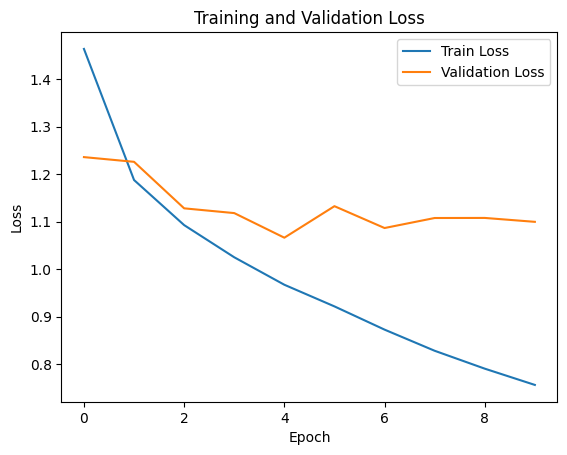

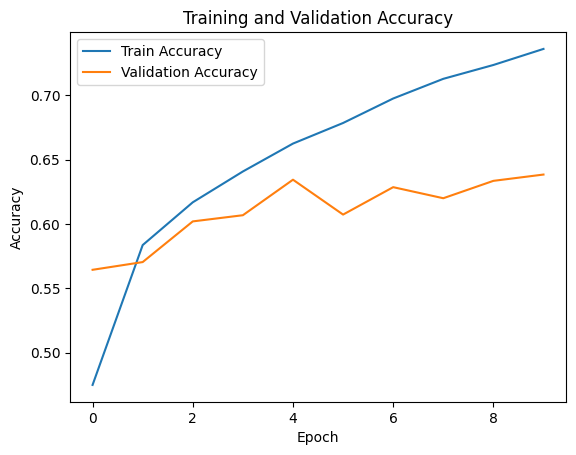

In [8]:
# Графік функції втрат
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Графік точності
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#**Висновки:** Після аналізу результатів навчання нейронної мережі для розпізнавання зображень у датасеті CIFAR-10 можна зробити такі висновки:

Функція втрат:
Графік функції втрат (Training and Validation Loss) показує, як змінюється втрата під час навчання. Зазвичай ми очікуємо, що значення функції втрат буде зменшуватися з кожною епохою. Якщо функція втрати зменшується як для тренувального, так і для валідаційного наборів, це може свідчити про ефективність навчання моделі.

Точність:
Графік точності (Training and Validation Accuracy) показує, як змінюється точність моделі під час навчання. Висока точність на тренувальному та валідаційному наборах свідчить про те, що модель добре узагальнюється та може ефективно передбачати класи зображень.

Перенавчання:
Якщо точність на тренувальному наборі даних зростає з кожною епохою, але точність на валідаційному наборі зменшується, це може бути ознакою перенавчання моделі. У цьому випадку модель може надто добре вивчати дані тренувального набору, що може вплинути на її здатність узагальнювати для нових даних.

Оптимальні параметри:
Експериментуйте з різними параметрами (кількість шарів, функції активації, кількість епох навчання та розмір batch size), щоб знайти найкращу комбінацію параметрів для покращення точності та уникнення перенавчання моделі.

Додаткові кроки:
Якщо модель показує перенавчання або не досягає очікуваної точності, може бути корисним застосувати техніки регуляризації, змінити архітектуру мережі або використовувати передньо навчені моделі (pre-trained models) для поліпшення результатів.

Загальною метою є підбір параметрів та архітектури мережі, що забезпечують найкращі результати на валідаційному наборі даних та мають здатність узагальнювати для нових зображень.